## Feature Engineering


*   The fourth project is the development of a notebook (code + explanation) that successfully engineers 12 unique types of features, **three** for each type of feature engineering: **transforming**, **interacting**, **mapping**, and **extracting**.
* The second part of the assignment is the development of a **deep learning classification** model to predict the direction of the S&P500 for the dates **2018-01-01—2018-07-12** (test set).
* The feature engineering section is unrelated to the model section, you can develop any features, not just features that would work for deep learning models (later on you can decide which features to use in your model).
*  You also have to uncomment all the example features and make them run successfully  → **every** feature example has some error/s that you have to fix. Please also describe the error you fixed!
*   Note that we *won't* be attempting to measure the quality of every feature (i.e., how much it improves the model), that is slightly too advanced for this course.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

Preparing the Data

In [148]:
# preparing our data
raw_prices = pd.read_csv("https://open-data.s3.filebase.com/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,1
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0


### Train Test Split

In [149]:
from sklearn.model_selection import train_test_split
y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Transforming

1. Refresh your mind on tranformation methods by going back to the material. I am simply providing 1 example here. 
1. Don't repeat my logarithmic return calculation, develop your own transformation (there are 1000s of types of transformations).
1. In the example I provide, there is also an error that you have to fix. For example, one of the errors below is that you should actually use `np.log1p()`, but there is another one, so watch out! 

In [150]:
# Example Transforming (has errors) 

# Name: Logarithmic return of FTSE 
# Description: Developing the logarithmic return feature for use within linear models that make normality assumptions.

#The first error is that we should change np.log() to np.log1p() as prompt mentioned.
#Since we have done train-test split, so we can apply log transformation to both sets.
#and fill na by zero which does not involve any learning which can avoid the data leakage.
X_train["FTSE_log"] = np.log1p(X_train["FTSE"].pct_change()).fillna(0)
X_test["FTSE_log"] = np.log1p(X_test["FTSE"].pct_change()).fillna(0)
X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_log
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0.000000
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,0.001812
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0.012885
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,-0.012445
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0.013845


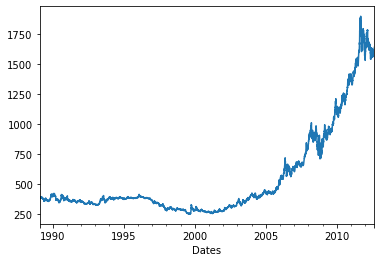

In [151]:
X_train['Gold'].plot()

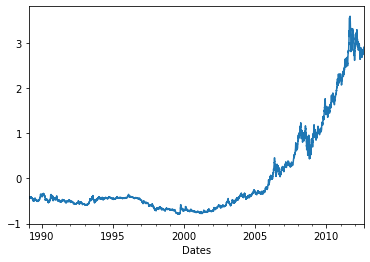

In [152]:
## Transforming 1 (Add code below)
#The price of gold shows a very large range (from ~250 to ~1900), thus I decided to use z-scaled normalize the data while preserving the shape.
#use train set's mean and std to avoid data leakage
X_train['Gold_zScaled'] = (X_train['Gold'] - X_train['Gold'].mean()) / X_train['Gold'].std()
X_test['Gold_zScaled'] = (X_test['Gold'] - X_train['Gold'].mean()) / X_train['Gold'].std()
X_train['Gold_zScaled'].plot()

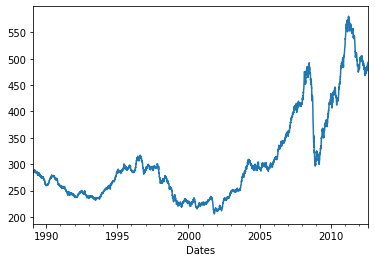

In [153]:
X_train['CRB'].plot()

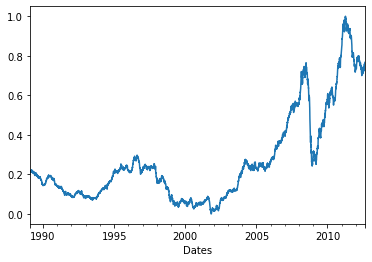

In [154]:
## Transforming 2 (Add code below)
#Similar log as tranformation 1. Using min-max normalization method.
X_train['CRB_minMaxScaled'] = (X_train['CRB'] - X_train['CRB'].min()) / (X_train['CRB'].max()-X_train['CRB'].min())
X_test['CRB_minMaxScaled'] = (X_test['CRB'] - X_train['CRB'].min()) / (X_train['CRB'].max()-X_train['CRB'].min())
X_train['CRB_minMaxScaled'].plot()

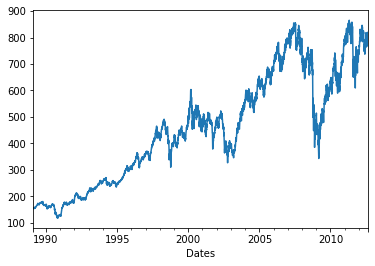

In [155]:
X_train['Russel2000'].plot()

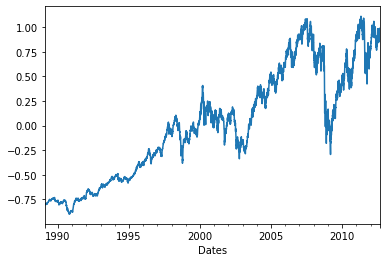

In [156]:
## Transforming 3 (Add code below)
#I used robust scaler to scale the Russel200 while avoiding the data leakage
from sklearn.preprocessing import RobustScaler
rs = RobustScaler(quantile_range=(25, 75)).fit(X_train[['Russel2000']])
X_train['Russel2000_robustScaled'] = rs.transform(X_train[['Russel2000']])
X_test['Russel2000_robustScaled'] = rs.transform(X_test[['Russel2000']])
X_train['Russel2000_robustScaled'].plot()

### Interacting

There are millions of possible interaction methods, be creative and come up with your own. For this assignment there is no 'right' feature engineering method, you simply develop one, and give it a name and a discreption.

In [157]:
# Example Interacting (has errors) 

# Name: Ratio of Gold return to 10Y treasury
# Desciption: Both gold and treasuries are safe-haven assets and descrepency in their ratio could be a sign of some marco-economic event.

#The error I fixed is add pct_change() when calculating the return rate of gold. The other possible error is the possible (-)inf generated when using pct_change().
#This error will be fixed afterwards. 
#I also fill the NA using zero
def gold_to_yield(df):
   teny_returns = df["US-10Y"].pct_change()
   #gold_returns = df["Gold"]
   gold_returns = df["Gold"].pct_change()
   df["gold_r__div__teny_r"] = gold_returns/teny_returns
   df = df.fillna(0)
   return df
X_train = gold_to_yield(X_train); X_test = gold_to_yield(X_test)
X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_log,Gold_zScaled,CRB_minMaxScaled,Russel2000_robustScaled,gold_r__div__teny_r
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,154.38,117.50,1636.57,133.584,286.67,0.000000,-0.415924,0.216208,-0.802036,0.000000
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,154.94,117.69,1642.94,135.052,287.03,0.001812,-0.417254,0.217169,-0.800528,2.043878
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,155.69,118.62,1659.11,137.134,285.63,0.012885,-0.425896,0.213434,-0.798508,8.724098
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,155.58,118.89,1656.86,137.037,284.69,-0.012445,-0.427891,0.210926,-0.798804,1.533094
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,156.84,118.28,1662.76,136.914,284.21,0.013845,-0.415260,0.209646,-0.795410,3.525563


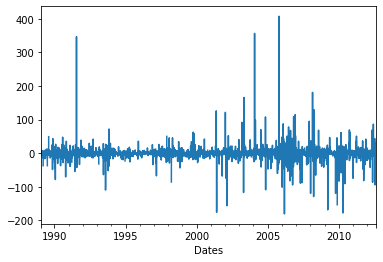

In [158]:
X_train["gold_r__div__teny_r"].plot()

In [177]:
## Interacting 1 (Add code below)
#This part using the result generated in the later part (US_riskFree rate). Please run the function def risk_free() under the extracting section first.
#I calculate SP500's sharpe ratio using its average return in past 20 business days (~one month) and the US risk free rate (return rate of US 10 years bond)
def SP_monthly_sharpe(df):
  df['SP_Monthly_Sharpe'] = (np.log1p(df["SP500"].pct_change()).rolling(20).mean() - df['US_riskFree'])/np.log1p(df["SP500"].pct_change()).rolling(20).std()
  df = df.fillna(0)
  return df

X_train = SP_monthly_sharpe(X_train); X_test = SP_monthly_sharpe(X_test)
X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol,US_riskFree,Euro_riskFree,SP_monthly,FTSE_montlyMaxMinRatio,SP_Monthly_Sharpe
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


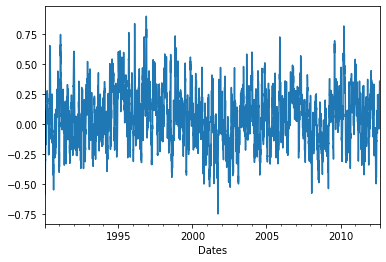

In [20]:
X_train['SP_Monthly_Sharpe'].plot()

In [160]:
## Interacting 2 (Add code below)
#compare US and emerging market using the change of the relative return rate of two markets.
def EM_US_index(df):
  df['EM_US_index'] = df['MSCI_EM'].pct_change()/df["SP500"].pct_change()
  df['EM_US_index'] = (df['EM_US_index'] - df['EM_US_index'].rolling(20).mean())/df['EM_US_index'].rolling(20).std()
  df = df.fillna(0)
  return df
X_train = EM_US_index(X_train); X_test = EM_US_index(X_test)

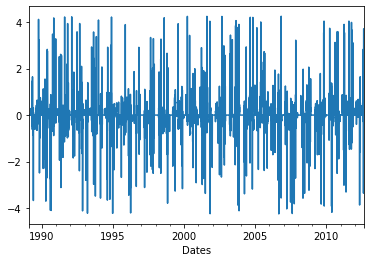

In [161]:
X_train['EM_US_index'].plot()

In [163]:
## Interacting 3 (Add code below)
#show people's confidence toward this country by comparing the yield rate of short term bond vs long term bond
def confidence(df):
  df['US_confidences'] = df['US-2Y'].pct_change()/df['US-10Y'].pct_change()
  df['French_confidences'] = df['French-2Y'].pct_change()/df['French-10Y'].pct_change()
  return df.fillna(0)
X_train = confidence(X_train); X_test = confidence(X_test)

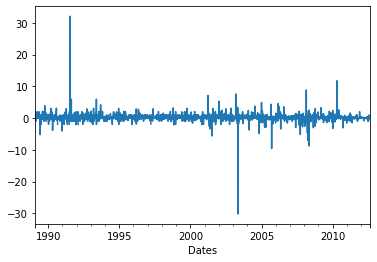

In [164]:
X_train['US_confidences'].plot()

### Mapping

This one is slightly harder, you have to identify other  dimensionality reduction methods, there are many more than just PCA. Maybe you can also look at performing the decompositions just on a single asset classes, e.g., US-2Y, US-5Y, US-10Y, US-30Y is a fixed income asset class, but there are a few others in the dataset.

<BarContainer object of 5 artists>

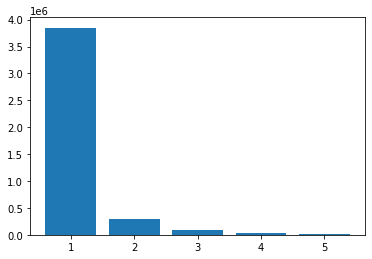

In [165]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=5)
 
# Fit and transform data
X_train = X_train.replace(np.inf,X_train[X_train != np.inf].max()).fillna(0)
X_train = X_train.replace(-np.inf,X_train[X_train != -np.inf].min()).fillna(0)
pca.fit_transform(X_train)
# I checked the best number of components by showing the bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
#Thus using 1 component is enough to do PCA.

In [166]:
# Example Mapping (has errors) 

# Name: First prinicipal component of all of the assets returns
# Description:For stocks the first component resmbles the return of the market, for multiple asset classes it could resemble a 'universal' asset class

def pca_first(X_train, X_test):
   sc = StandardScaler()
   # I replace the infinity by the correponding max or min
   X_train_s = X_train.replace(np.inf,X_train[X_train != np.inf].max()).fillna(0)
   X_train_s = X_train_s.replace(-np.inf,X_train_s[X_train_s != -np.inf].min()).fillna(0)
   # apply the learned transformation of training data to testing data.
   X_test_s = X_test.replace(np.inf,X_train[X_train != np.inf].max()).fillna(0)
   X_test_s = X_test_s.replace(-np.inf,X_train_s[X_train_s != -np.inf].min()).fillna(0)
   X_train_s = sc.fit_transform(X_train_s)
   X_test_s = sc.transform(X_test_s)

   pca = PCA(1)
   X_train["first_prinicipal"] = pca.fit_transform(X_train_s)
   X_test["first_prinicipal"] = pca.transform(X_test_s)
   return X_train, X_test

X_train, X_test = pca_first(X_train, X_test)
X_train.head()
# # ValueError: Input contains infinity or a value too large for dtype('float64').

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,CRB,FTSE_log,Gold_zScaled,CRB_minMaxScaled,Russel2000_robustScaled,gold_r__div__teny_r,EM_US_index,US_confidences,French_confidences,first_prinicipal
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,286.67,0.000000,-0.415924,0.216208,-0.802036,0.000000,0.0,0.000000,0.000000,-5.441767
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,287.03,0.001812,-0.417254,0.217169,-0.800528,2.043878,0.0,0.497224,0.625534,-5.451553
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,285.63,0.012885,-0.425896,0.213434,-0.798508,8.724098,0.0,1.978250,-0.067929,-5.470120
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,284.69,-0.012445,-0.427891,0.210926,-0.798804,1.533094,0.0,-0.000000,0.667745,-5.527782
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,284.21,0.013845,-0.415260,0.209646,-0.795410,3.525563,0.0,0.271214,0.211065,-5.505936


<BarContainer object of 3 artists>

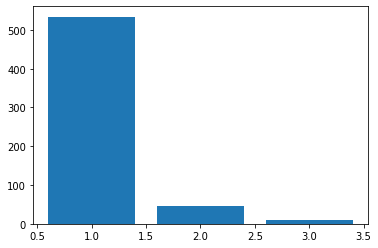

In [169]:
## Mapping 1 (Add code below)
from sklearn.decomposition import TruncatedSVD
USgovBond_train = X_train[['US-2Y','US-5Y','US-10Y','US-30Y']]
USgovBond_test = X_test[['US-2Y','US-5Y','US-10Y','US-30Y']]
USgovBond_train  = USgovBond_train.replace(np.inf,USgovBond_train[USgovBond_train != np.inf].max()).fillna(0)
USgovBond_train = USgovBond_train.replace(-np.inf,USgovBond_train[USgovBond_train != -np.inf].min()).fillna(0)
USgovBond_test = USgovBond_test.replace(np.inf,USgovBond_train[USgovBond_train != np.inf].max()).fillna(0)
USgovBond_test = USgovBond_test.replace(-np.inf,USgovBond_train[USgovBond_train != -np.inf].min()).fillna(0)
svd = TruncatedSVD(n_components=3)
svd.fit_transform(USgovBond_train)
plt.bar(
    range(1,len(svd.explained_variance_)+1),
    svd.explained_variance_
    )

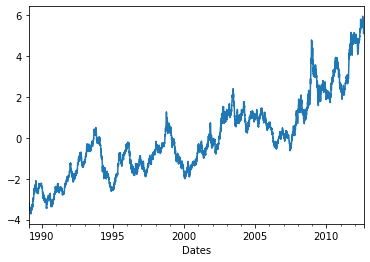

In [171]:
#Use SVD to reduce the dimension of US goverment bond
def svd_USgovBond(X_train, X_test):
   sc = StandardScaler()
   USgovBond_train_s = sc.fit_transform(USgovBond_train)
   USgovBond_test_s = sc.transform(USgovBond_test)

   svd = TruncatedSVD(1)
   X_train["USgovBondSVD"] = svd.fit_transform(USgovBond_train_s)
   X_test["USgovBondSVD"] = svd.transform(USgovBond_test_s)
   return X_train, X_test

X_train, X_test = svd_USgovBond(X_train, X_test)
X_train["USgovBondSVD"].plot()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


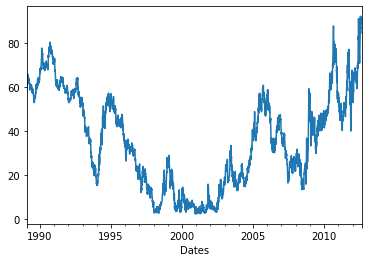

In [119]:
## Mapping 2 (Add code below)
from sklearn.cluster import MiniBatchKMeans
#Use MiniBatchKMeans to reduce the dimension of French goverment bond
def mbk_FrenchgovBond(X_train, X_test):
   sc = StandardScaler()
   Frenchgov_train = X_train[['French-2Y','French-5Y','French-10Y','French-30Y']]
   Frenchgov_test = X_test[['French-2Y','French-5Y','French-10Y','French-30Y']]
   Frenchgov_train  = Frenchgov_train.replace(np.inf,Frenchgov_train[Frenchgov_train != np.inf].max()).fillna(0)
   Frenchgov_train = Frenchgov_train.replace(-np.inf,Frenchgov_train[Frenchgov_train != -np.inf].min()).fillna(0)
   Frenchgov_test = Frenchgov_test.replace(np.inf,Frenchgov_train[Frenchgov_train != np.inf].max()).fillna(0)
   Frenchgov_test = Frenchgov_test.replace(-np.inf,Frenchgov_train[Frenchgov_train != -np.inf].min()).fillna(0)
   Frenchgov_train_s = sc.fit_transform(Frenchgov_train)
   Frenchgov_test_s = sc.transform(Frenchgov_test)

   mbk = MiniBatchKMeans(n_clusters=1)
   X_train['FrenchgovBondMBK'] = mbk.fit_transform(Frenchgov_train)
   X_test['FrenchgovBondMBK'] = mbk.transform(Frenchgov_test_s)
   return X_train, X_test
X_train, X_test = mbk_FrenchgovBond(X_train, X_test)
X_train['FrenchgovBondMBK'].plot()

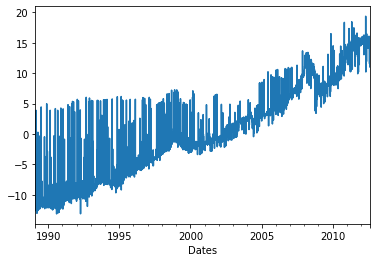

In [172]:
## Mapping 3 (Add code below)
from sklearn import manifold
#Use Isomap to reduce the dimension of whole dataset
def iso_first(X_train, X_test):
   sc = StandardScaler()
   X_train_s = X_train.replace(np.inf,X_train[X_train != np.inf].max()).fillna(0)
   X_train_s = X_train_s.replace(-np.inf,X_train_s[X_train_s != -np.inf].min()).fillna(0)
   X_test_s = X_test.replace(np.inf,X_train[X_train != np.inf].max()).fillna(0)
   X_test_s = X_test_s.replace(-np.inf,X_train_s[X_train_s != -np.inf].min()).fillna(0)
   X_train_s = sc.fit_transform(X_train_s)
   X_test_s = sc.transform(X_test_s)

   iso = manifold.Isomap(n_neighbors=20, n_components=1)
   X_train["first_ISO"] = iso.fit_transform(X_train_s)
   X_test["first_ISO"] = iso.fit_transform(X_test_s)
   return X_train, X_test
X_train, X_test = iso_first(X_train, X_test)
X_train["first_ISO"].plot()

Extracting

In [173]:
# Example Extracting (has errors) 
# Name: Annualized volatility in returns
# Description: We are developing an annualized volatility measure for all asset returns, which is a good measure of market turbulence

#I change the number of days from 365 to 252 which is the number of business days in a year and it is 251**0.5 since the data is a sampe thus N should minus one.
def vola(df):
   df = df[['FTSE', 'EuroStoxx50', 'SP500', 'Gold', 'French-2Y', 'French-5Y',
       'French-10Y', 'French-30Y', 'US-2Y', 'US-5Y', 'US-10Y', 'US-30Y',
       'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'CRB']]
   volatility = df.pct_change().rolling(window=252).std()*(251**0.5)
   new_names = [(i,i+'_vol') for i in df.columns.values]
   volatility.rename(columns = dict(new_names), inplace=True)
   df = pd.concat((df, volatility), axis=1).fillna(0)
   return df

X_train = vola(X_train); X_test = vola(X_test)
X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,French-30Y_vol,US-2Y_vol,US-5Y_vol,US-10Y_vol,US-30Y_vol,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
## Extracting 1 (Add code below)
#Calculate risk-free rate using 10-years bond
def risk_free(df):
  df['US_riskFree'] = (1+((df['US-10Y']-df['US-10Y'].shift(252))/df['US-10Y'].shift(252)))**(1/252)-1
  df['Euro_riskFree'] = (1+((df['French-10Y']-df['French-10Y'].shift(252))/df['French-10Y'].shift(252)))**(1/252)-1
  return df.fillna(0)
X_train = risk_free(X_train); X_test = risk_free(X_test)
X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US-5Y_vol,US-10Y_vol,US-30Y_vol,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol,US_riskFree,Euro_riskFree
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
## Extracting 2 (Add code below)
def monthly_return(df):
  df['SP_monthly'] = np.log1p(df['SP500'])-np.log1p(df['SP500'].shift(20))
  return df.fillna(0)
X_train = monthly_return(X_train); X_test = monthly_return(X_test)
X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US-10Y_vol,US-30Y_vol,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol,US_riskFree,Euro_riskFree,SP_monthly
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
## Extracting 3 (Add code below)
def monthly_MaxMinRatio(df):
  df['FTSE_montlyMaxMinRatio'] = df['FTSE'].rolling(20).max()/df['FTSE'].rolling(20).min()
  return df.fillna(0)
X_train = monthly_MaxMinRatio(X_train); X_test = monthly_MaxMinRatio(X_test)
X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US-30Y_vol,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol,US_riskFree,Euro_riskFree,SP_monthly,FTSE_montlyMaxMinRatio
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Deep Learning Binary Classification

* For the deep learning model you can perform new data preprocessing methods and new feature engineering that are better suited to neural networks. You can also use all or some of the features you developed above (most features work in deep learning models as long as they are normalized).
* It is very hard to predict the stock price, so in my grading I will look more at the quality of the model you process (e.g., that there is no data leakage, that you performed some hyperparameter tuning).
* Make sure that you switch your GPU on, you have access to it on Colab. The training stage also takes long, you might want to use a smaller amount of data, or fewer epochs at first to speed up your development process.
* After your training is done, you don't have to save your model, but you do have to print the performance of your model. You can report two metrics the ROC(AUC) and the Accuracy against the test set. 
* Also remember to set the random seed (random state) so that when I run your software, I get similar results (the results doesn't have to be exactely the same). 
* You can choose any type of deep learning archetecture, e.g., LSTM, GRU, CNN, it is up to you.
* Remember that this section is less that 25% of the grade, so don't waste your time here. 
* And lastly, remember this is the stock market, so it is **difficult** to have an accuracy above 50%, good luck!

In [179]:
## Implement Here

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#replace all infinity by corresponding max or min, and fill na by zero
X_train  = X_train.replace(np.inf,X_train[X_train != np.inf].max()).fillna(0)
X_train = X_train.replace(-np.inf,X_train[X_train != -np.inf].min()).fillna(0)
X_test = X_test.replace(np.inf,X_train[X_train != np.inf].max()).fillna(0)
X_test = X_test.replace(-np.inf,X_train[X_train != -np.inf].min()).fillna(0)
#standardize the data
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
X_train = pd.DataFrame(X_train_s,columns = X_train.columns)
X_test = pd.DataFrame(X_test_s,columns = X_test.columns)
X_test.tail()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol,US_riskFree,Euro_riskFree,SP_monthly,FTSE_montlyMaxMinRatio,SP_Monthly_Sharpe
1532,2.229236,0.757541,4.763308,1.877321,-3.865295,2.186631,4.608763,4.649437,1.580257,1.895884,...,-0.477431,-0.569961,-0.473458,-0.606991,-0.654096,-1.061287,0.114337,-0.269748,-0.317987,-0.382341
1533,2.279828,0.767667,4.826808,1.895192,-3.868906,2.179455,4.595024,4.566550,1.574733,1.881472,...,-0.476287,-0.568093,-0.472671,-0.595025,-0.653623,-1.120210,0.093126,-0.096172,-0.317987,-0.061377
1534,2.282743,0.778569,4.852025,1.876284,-3.873548,2.172280,4.589120,4.560524,1.563540,1.870723,...,-0.475972,-0.574206,-0.471746,-0.595041,-0.668714,-1.183654,0.013500,-0.057360,-0.317987,0.016835
1535,2.210709,0.735395,4.800339,1.854663,-3.885153,2.170903,4.593038,4.599259,1.569064,1.886887,...,-0.473770,-0.570985,-0.462946,-0.589577,-0.637833,-1.115046,0.008079,-0.126764,-0.317987,-0.120319
1536,2.253442,0.755003,4.863630,1.857323,-3.893921,2.169671,4.607744,4.625507,1.560779,1.879720,...,-0.475714,-0.569333,-0.463174,-0.588474,-0.634361,-1.027222,0.148614,0.013662,-0.460274,0.083180


In [180]:
#reduce amount of multicollearity by deleting column with highest VIF until no column's VIF is larger than 5
X_VIF = add_constant(X_train)
while len(X_VIF.columns) > 1:
  vif_scores = pd.DataFrame([variance_inflation_factor(X_VIF.values, i) 
                   for i in range(X_VIF.shape[1])], 
                  index=X_VIF.columns)
  vif_scores.reset_index(inplace = True)
  vif_scores.columns = ['Feature', 'VIFscore']
  vif_scores = vif_scores.loc[vif_scores['Feature'] != 'const', :]
  vif_scores = vif_scores.sort_values(by = ['VIFscore'], ascending = False)
  if vif_scores['VIFscore'].iloc[0] > 5:
    X_VIF = X_VIF.drop(vif_scores['Feature'].iloc[0], axis=1)
  else:
    break

print(vif_scores)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                   Feature  VIFscore
8              MSCI_EM_vol  4.928282
11              SP_monthly  4.241918
13       SP_Monthly_Sharpe  4.213762
5                 Gold_vol  4.171231
2                   US-30Y  3.808558
4          EuroStoxx50_vol  3.255023
10           Euro_riskFree  2.550967
9              US_riskFree  2.447649
3                      CRB  2.014506
7                US-2Y_vol  1.869564
6           French-10Y_vol  1.625822
1              EuroStoxx50  1.527277
12  FTSE_montlyMaxMinRatio  1.189732


In [184]:
#Parameter tuning
#tuning batch size and number of epochs
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
def create_model():
   model = tf.keras.Sequential([
      tf.keras.Input(shape=(13,)),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid"),
      ])
   model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
   return model
seed = 7
tf.random.set_seed(seed)
model = KerasClassifier(model=create_model, verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train[vif_scores['Feature']],y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Best: 0.509519 using {'batch_size': 100, 'epochs': 10}
0.499591 (0.021813) with: {'batch_size': 10, 'epochs': 10}
0.506101 (0.017242) with: {'batch_size': 10, 'epochs': 50}
0.503172 (0.014510) with: {'batch_size': 10, 'epochs': 100}
0.505287 (0.014105) with: {'batch_size': 20, 'epochs': 10}
0.507891 (0.011450) with: {'batch_size': 20, 'epochs': 50}
0.506426 (0.012731) with: {'batch_size': 20, 'epochs': 100}
0.506915 (0.012151) with: {'batch_size': 40, 'epochs': 10}
0.502846 (0.015823) with: {'batch_size': 40, 'epochs': 50}
0.507891 (0.012486) with: {'batch_size': 40, 'epochs': 100}
0.508542 (0.010529) with: {'batch_size': 60, 'epochs': 10}
0.500730 (0.019549) with: {'batch_size': 60, 'epochs': 50}
0.504148 (0.017089) with: {'batch_size': 60, 'epochs': 100}
0.508705 (0.013540) with: {'batch_size': 80, 'epochs': 10}
0.504961 (0.016286) with: {'batch_size': 80, 'epochs': 50}
0.500895 (0.013217) with: {'batch_size': 80, 'epochs': 100}
0.509519 (0.010567) with: {'batch_size': 100, 'epochs':

In [185]:
#tuning the optimizer
def create_model():
   model = tf.keras.Sequential([
      tf.keras.Input(shape=(13,)),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid"),
      ])
   return model
model = KerasClassifier(model=create_model, loss="binary_crossentropy", epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
seed = 7
tf.random.set_seed(seed)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train[vif_scores['Feature']],y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Best: 0.506752 using {'optimizer': 'Adam'}
0.504311 (0.012029) with: {'optimizer': 'SGD'}
0.503660 (0.014883) with: {'optimizer': 'RMSprop'}
0.505776 (0.011700) with: {'optimizer': 'Adagrad'}
0.498779 (0.015583) with: {'optimizer': 'Adadelta'}
0.506752 (0.012735) with: {'optimizer': 'Adam'}
0.501383 (0.012372) with: {'optimizer': 'Adamax'}
0.503660 (0.014138) with: {'optimizer': 'Nadam'}


In [195]:
#To decrease the time of running, I decrease the number of hidden layers to 1
def create_model():
   model = tf.keras.Sequential([
      tf.keras.Input(shape=(13,)),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid"),
      ])
   return model
model = KerasClassifier(model=create_model, loss="binary_crossentropy", optimizer="Adam", epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
seed = 7
tf.random.set_seed(seed)
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(optimizer__learning_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train[vif_scores['Feature']],y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.523030 using {'optimizer__learning_rate': 0.2}
0.503334 (0.013512) with: {'optimizer__learning_rate': 0.001}
0.506264 (0.012094) with: {'optimizer__learning_rate': 0.01}
0.492271 (0.017465) with: {'optimizer__learning_rate': 0.1}
0.523030 (0.015966) with: {'optimizer__learning_rate': 0.2}
0.515380 (0.030106) with: {'optimizer__learning_rate': 0.3}


In [197]:
#To decrease the time of running, I decrease the number of hidden layers to 1
def create_model(activation='relu'):
 # create model
  model = tf.keras.Sequential([
      tf.keras.Input(shape=(13,)),
      tf.keras.layers.Dense(100,activation=activation),
      tf.keras.layers.Dense(1,activation="sigmoid"),
      ])
  return model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.2)
seed = 7
tf.random.set_seed(seed)
model = KerasClassifier(model=create_model, loss="binary_crossentropy", optimizer=optimizer, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train[vif_scores['Feature']],y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.518631 using {'model__activation': 'sigmoid'}
0.496337 (0.012276) with: {'model__activation': 'softmax'}
0.509361 (0.017875) with: {'model__activation': 'softplus'}
0.502198 (0.006467) with: {'model__activation': 'softsign'}
0.502032 (0.013714) with: {'model__activation': 'relu'}
0.500732 (0.001922) with: {'model__activation': 'tanh'}
0.518631 (0.012479) with: {'model__activation': 'sigmoid'}
0.498450 (0.031941) with: {'model__activation': 'hard_sigmoid'}
0.510172 (0.008345) with: {'model__activation': 'linear'}


In [216]:
def create_model(neurons):
 model = tf.keras.Sequential([
      tf.keras.Input(shape=(13,)),
      tf.keras.layers.Dense(neurons,activation="sigmoid"),
      tf.keras.layers.Dense(1,activation="sigmoid"),
      ])
 return model
seed = 7
tf.random.set_seed(seed)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.2)
model = KerasClassifier(model=create_model, loss="binary_crossentropy", optimizer=optimizer, epochs=100, batch_size=10, verbose=0)
neurons = [2, 5, 10, 20, 30, 50, 70, 100]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train[vif_scores['Feature']],y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: 0.521403 using {'model__neurons': 50}
0.512776 (0.008947) with: {'model__neurons': 2}
0.505450 (0.014903) with: {'model__neurons': 5}
0.486734 (0.028946) with: {'model__neurons': 10}
0.500407 (0.012195) with: {'model__neurons': 20}
0.509193 (0.010303) with: {'model__neurons': 30}
0.521403 (0.019401) with: {'model__neurons': 50}
0.488523 (0.031034) with: {'model__neurons': 70}
0.490152 (0.012281) with: {'model__neurons': 100}


In [217]:
#Thus the final model is 
model = tf.keras.Sequential([
      tf.keras.Input(shape=(13,)),
      tf.keras.layers.Dense(50,activation="sigmoid"),
      tf.keras.layers.Dense(1,activation="sigmoid"),
      ])
seed = 7
tf.random.set_seed(seed)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.2)
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=['accuracy'])
model.fit(X_train[vif_scores['Feature']],y_train, batch_size=10, epochs=100,verbose=0)

In [224]:
print("accuracy score: %f"%(model.evaluate(X_test[vif_scores['Feature']],y_test))[1])

49/49 [==============================] - 0s 883us/step - loss: 0.9986 - accuracy: 0.4756
accuracy score: 0.475602


49/49 [==============================] - 0s 782us/step


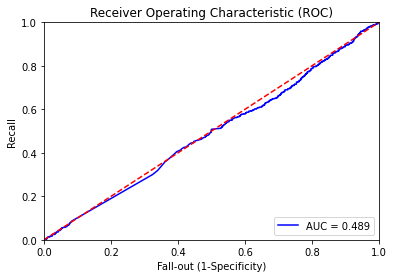

In [220]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
false_positive_rate, recall, thresholds = roc_curve(y_test, model.predict(X_test[vif_scores['Feature']]))
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()